In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from name_params import *
from flamelet_integration import *

In [2]:
filenum = 100.
dir_name = 'flamelets'
file_suffix = 'csv'

filenames = []
chi = np.zeros(1)
T = np.zeros(1)
C = np.zeros(1)

os.chdir(dir_name)
for filename in glob.glob('.'.join(['*', file_suffix])):
    params = name2params( filename[:-1-len(file_suffix)] )
    chi = np.append(chi, params['chi'])
    T = np.append(T, params['T'])
    C = np.append(C, params['ProgressVariable'])
    filenames.append(filename)
os.chdir('..')

chi = np.delete( chi, 0, 0 )
T = np.delete( T, 0, 0 )
C = np.delete( C, 0, 0 )

In [3]:
idx = np.argsort( T )[::-1]

In [4]:
chi = chi[idx]
T = T[idx]
C = C[idx]
filenames = np.array( filenames )[idx]

In [5]:
list_delete = []
Lambda = (T-T[-1])/(T[0]-T[-1])
#Lambda = (C-C[-1])/(C[0]-C[-1])
diff_limit = 1./3./filenum
v_old = Lambda[0] + 1.
for i, v in enumerate(Lambda):
    if v_old - v > diff_limit :
        v_old = v
    else:
        list_delete.append(i)

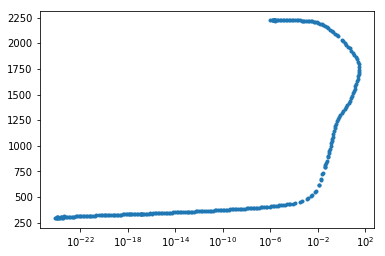

In [6]:
plt.semilogx(chi, T, '.')

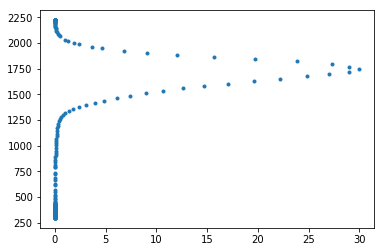

In [7]:
plt.plot(chi,T,'.')

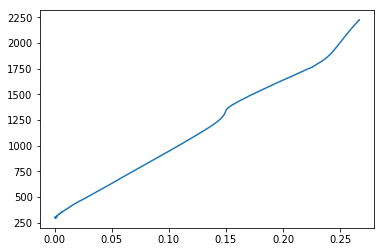

In [8]:
plt.plot(C, T)

In [9]:
chi_new = np.delete(chi, list_delete)
T_new = np.delete(T, list_delete)
C_new = np.delete(C, list_delete)

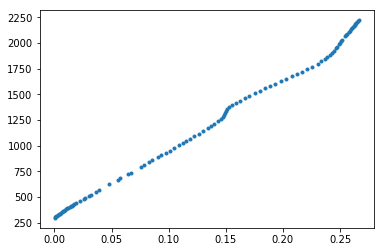

In [10]:
plt.plot(C_new, T_new, '.')

Lambda

In [12]:
for i in list_delete:
    os.remove('{}/{}'.format(dir_name,filenames[i]))

In [ ]:
T

In [13]:
T_new

array([2222., 2214., 2203., 2192., 2183., 2175., 2168., 2155., 2145.,
       2132., 2120., 2108., 2092., 2079., 2066., 2032., 2019., 2000.,
       1987., 1963., 1950., 1926., 1907., 1886., 1865., 1843., 1820.,
       1798., 1766., 1743., 1722., 1699., 1676., 1653., 1629., 1605.,
       1580., 1557., 1533., 1510., 1486., 1463., 1439., 1418., 1395.,
       1376., 1356., 1339., 1322., 1303., 1283., 1261., 1238., 1213.,
       1189., 1170., 1142., 1115., 1090., 1068., 1044., 1024., 1002.,
        973.,  952.,  931.,  905.,  887.,  855.,  836.,  812.,  796.,
        737.,  721.,  680.,  666.,  621.,  564.,  547.,  517.,  506.,
        487.,  480.,  461.,  441.,  433.,  424.,  416.,  409.,  402.,
        394.,  387.,  380.,  373.,  366.,  359.,  352.,  345.,  338.,
        331.,  324.,  317.,  310.,  303.,  295.])